Karthik Konath (kk28699), Kyle Polansky (kpp446)

# <center>EE 379K-DS Lab 1<center>

# Question 1
Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#Sample from 2 normal distributions 
normal1Samples = np.random.normal(-10, 5, 1000)
normal2Samples = np.random.normal(10, 5, 1000)

#Sum each point in the distributions
normalSum = normal1Samples + normal2Samples

### 1.a
Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point, and plot the histogram of the resulting 1000 points. What do you observe?

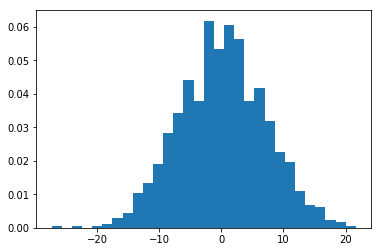

In [3]:
#Plot sum distribution
count, bins, ignored = plt.hist(normalSum, 30, density=True)
plt.show()

### 1.b
Estimate the mean and the variance of the sum.

In [4]:
#Calculate Mean and Variance
normalSumMean = np.mean(normalSum)
normalSumVariance = np.var(normalSum)

print("Mean: %s" % (normalSumMean))
print("Variance: %s" % (normalSumVariance))

Mean: 0.179075975476
Variance: 49.3423186407


# Question 2
Central Limit Theorem. Let $X_i$ be an iid Bernoulli random variable with value $\{-1,1\}$. Look at the random variable $Z_n = \frac{1}{n} \sum X_i$. By taking 1000 draws from $Z_n$, plot its histogram. Check that for small $n$ (say, 5-10) $Z_n$ does not look that much like a Gaussian, but when $n$ is bigger (already by the time $n$ = 30 or 50) it looks much more like a Gaussian. Check also for much bigger $n$: $n$ = 250, to see that at this point, one can really see the bell curve.

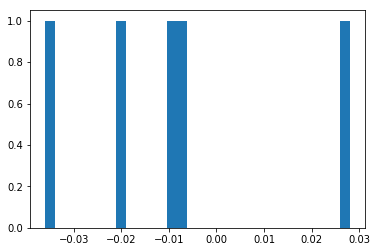

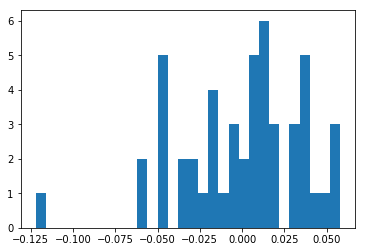

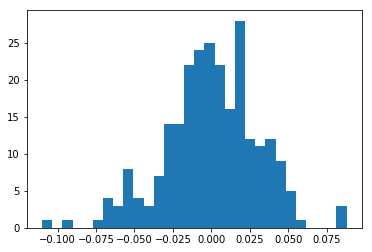

In [66]:
from scipy.stats import bernoulli

#Create bernoulli distribution (50% 0's and 50% 1's)
#dist = bernoulli.rvs(.5)

#Replace 0's with -1 to get a -1/1 distribution
#dist[dist == 0] = -1

#Think I may be on the wrong track with this problem.
n1=0
i1=0
z1=[]
while (n1 < 5):
    z1.append(0.0)
    while (i1<1000):
        x1 = (bernoulli.rvs(0.5))*2-1
        z1[n1]+=x1
        i1+=1
    z1[n1]/=i1
    n1+=1
    i1=0
plt.hist(z1, 30)
plt.show()

n2=0
i2=0
z2=[]
while (n2 < 50):
    z2.append(0.0)
    while (i2<1000):
        x2 = (bernoulli.rvs(0.5))*2-1
        z2[n2]+=x2
        i2+=1
    z2[n2]/=i2
    n2+=1
    i2=0
plt.hist(z2, 30)
plt.show()

n3=0
i3=0
z3=[]
while (n3 < 250):
    z3.append(0.0)
    while (i3<1000):
        x3 = (bernoulli.rvs(0.5))*2-1
        z3[n3]+=x3
        i3+=1
    z3[n3]/=i3
    n3+=1
    i3=0
plt.hist(z3, 30)
plt.show()

# Question 3
Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean and standard deviation of this gaussian using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

Mean Forumla: $\frac{1}{n} * (\sum X_i)$  
Variance Formula: $\sqrt{\frac{1}{n} \sum(x_i - \mu)^2}$

In [13]:
#Generate 25,000 samples
normal = np.random.normal(0, 5, 25000)

#Manually calculate sum
normalSum = np.sum(normal)
normalMean = np.divide(normalSum, normal.size)

print("Mean: %s" % (normalMean))

#Manually calculate standard deviation
normalDifference = np.subtract(normal, normalMean)
normalDifferenceSquared = np.power(normalDifference, 2)
normalDifferenceSquaredSum = np.sum(normalDifferenceSquared)
normalVariance = np.divide(normalDifferenceSquaredSum, normal.size)
normalStandardDeviation = np.sqrt(normalVariance)

print("Standard Deviation: %s" % (normalStandardDeviation))

Mean: -0.0188711928608
Standard Deviation: 4.98196711289


# Question 4
Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution



Then, estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [27]:
#Generate 10,000 random multivariate samples
k = np.random.multivariate_normal([-5,5],[[20,.8],[.8,30]],10000)

#Manually calculate mean
kSum = np.sum(k, axis=0)
kMean = np.divide(kSum,k.shape[0])
print "Mean: ", kMean

#Manually calculate covariance matrix
xdiff = np.subtract(k,kMean)
xdiffmult = np.multiply(xdiff[:,0],xdiff[:,1])
xdiffmultsum = np.sum(xdiffmult)
covar = np.divide(xdiffmultsum,k.shape[0]-1)
varx = np.divide(np.sum(np.square(k[:,0]-kMean[0])),k.shape[0]-1)
vary = np.divide(np.sum(np.square(k[:,1]-kMean[1])),k.shape[0]-1)
COV = [[varx,covar],[covar,vary]]
print"COV: ", COV

Mean:  [-4.9293782   4.97575529]
COV:  [[20.221773785430326, 0.27975294509373494], [0.27975294509373494, 30.346783231009113]]


# Question 5
Download from Canvas/Files the dataset PatientData.csv.

Each row is a patient and the last column is the condition that the patient has. Do data exploration using Pandas and other visualization tools to understand what you can about the dataset. For example:  
>    (a) How many patients and how many features are there?  
    (b) What is the meaning of the first 4 features? See if you can understand what they mean.  
    (c) Are there missing values? Replace them with the average of the corresponding feature column  
    (d) How could you test which features strongly influence the patient condition and which do not?  

List what you think are the three most important features.

In [8]:
import pandas as pd

#Import file
data = pd.read_csv('PatientData.csv')